In [1]:
connect to drive to read files from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
gsg_df_train = pd.read_csv('/content/drive/My Drive/X_Train_Data_Input.csv')
gsg_df_y_train = pd.read_csv('/content/drive/My Drive/Y_Train_Data_Target.csv')
df_test = pd.read_csv('/content/drive/My Drive/X_Test_Data_Input.csv')
df_y_test= pd.read_csv('/content/drive/My Drive/Y_Test_Data_Target.csv')


In [ ]:
!pip install summarytools
import summarytools as st
from summarytools import dfSummary
dfSummary(gsg_df_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9675838361143908
Test Accuracy: 0.9680068166534206
Training Precision: 0.8002521569306074
Test Precision: 0.80068601777745
Training Recall: 0.8745019113098212
Test Recall: 0.8796904125131696
Training ROC AUC: 0.9873604928786761
Test ROC AUC: 0.9876661371891498


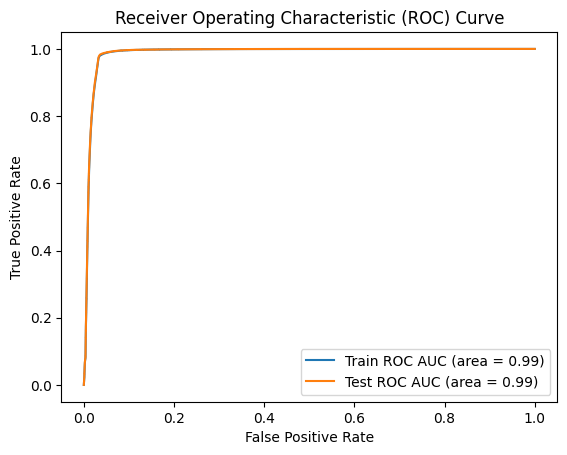

In [3]:
#logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Imputation
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_train_imputed = imputer.fit_transform(gsg_df_train.drop(columns=['ID']))
X_test_imputed = imputer.transform(df_test.drop(columns=['ID']))

# Build Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_imputed, gsg_df_y_train.drop(columns=['ID']))

# Predictions
y_train_pred = model.predict(X_train_imputed)
y_test_pred = model.predict(X_test_imputed)

# Model Performance Metrics
train_accuracy = accuracy_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred)
test_accuracy = accuracy_score(df_y_test.drop(columns=['ID']), y_test_pred)
train_precision = precision_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred)
test_precision = precision_score(df_y_test.drop(columns=['ID']), y_test_pred)
train_recall = recall_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred)
test_recall = recall_score(df_y_test.drop(columns=['ID']), y_test_pred)

# ROC and AUC
y_train_pred_proba = model.predict_proba(X_train_imputed)[:, 1]
y_test_pred_proba = model.predict_proba(X_test_imputed)[:, 1]
train_roc_auc = roc_auc_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_proba)
test_roc_auc = roc_auc_score(df_y_test.drop(columns=['ID']), y_test_pred_proba)

train_fpr, train_tpr, _ = roc_curve(gsg_df_y_train.drop(columns=['ID']), y_train_pred_proba)
test_fpr, test_tpr, _ = roc_curve(df_y_test.drop(columns=['ID']), y_test_pred_proba)

# Print Results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Training Precision:", train_precision)
print("Test Precision:", test_precision)
print("Training Recall:", train_recall)
print("Test Recall:", test_recall)
print("Training ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)

# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label='Train ROC AUC (area = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, label='Test ROC AUC (area = %0.2f)' % test_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Basic Random Forest Model Performance:
Training Accuracy: 0.9973087362268558
Test Accuracy: 0.9767989240080699
Training Precision: 0.9790833999467093
Test Precision: 0.8483747753145596
Training Recall: 0.9926654329825888
Test Recall: 0.9180241510657265
Training ROC AUC: 0.9998927064233043
Test ROC AUC: 0.9941367401293079


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Revised Random Forest Model Performance (Fine-tuned):
Training Accuracy: 0.9768166667303502
Test Accuracy: 0.9767454300910925
Training Precision: 0.8473935064773448
Test Precision: 0.8448838762335832
Training Recall: 0.9197790174651844
Test Recall: 0.9228057379042062
Training ROC AUC: 0.9939512405125056
Test ROC AUC: 0.9937207492619522


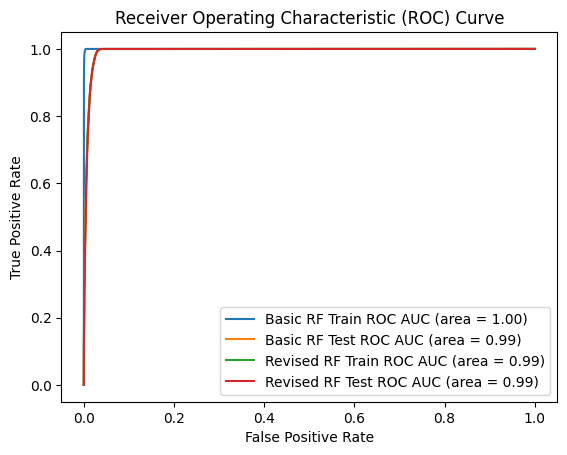

In [4]:
# random forest classifier

from google.colab import drive
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

drive.mount('/content/drive')
gsg_df_train = pd.read_csv('/content/drive/My Drive/X_Train_Data_Input.csv')
gsg_df_y_train = pd.read_csv('/content/drive/My Drive/Y_Train_Data_Target.csv')
df_test = pd.read_csv('/content/drive/My Drive/X_Test_Data_Input.csv')
df_y_test= pd.read_csv('/content/drive/My Drive/Y_Test_Data_Target.csv')

# Imputation
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_train_imputed = imputer.fit_transform(gsg_df_train.drop(columns=['ID']))
X_test_imputed = imputer.transform(df_test.drop(columns=['ID']))

# Build Random Forest Model (Basic Model)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_imputed, gsg_df_y_train.drop(columns=['ID']))

# Predictions
y_train_pred_rf = rf_model.predict(X_train_imputed)
y_test_pred_rf = rf_model.predict(X_test_imputed)

# Model Performance Metrics (Basic Model)
train_accuracy_rf = accuracy_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_rf)
test_accuracy_rf = accuracy_score(df_y_test.drop(columns=['ID']), y_test_pred_rf)
train_precision_rf = precision_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_rf)
test_precision_rf = precision_score(df_y_test.drop(columns=['ID']), y_test_pred_rf)
train_recall_rf = recall_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_rf)
test_recall_rf = recall_score(df_y_test.drop(columns=['ID']), y_test_pred_rf)

# ROC and AUC (Basic Model)
y_train_pred_proba_rf = rf_model.predict_proba(X_train_imputed)[:, 1]
y_test_pred_proba_rf = rf_model.predict_proba(X_test_imputed)[:, 1]
train_roc_auc_rf = roc_auc_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_proba_rf)
test_roc_auc_rf = roc_auc_score(df_y_test.drop(columns=['ID']), y_test_pred_proba_rf)

train_fpr_rf, train_tpr_rf, _ = roc_curve(gsg_df_y_train.drop(columns=['ID']), y_train_pred_proba_rf)
test_fpr_rf, test_tpr_rf, _ = roc_curve(df_y_test.drop(columns=['ID']), y_test_pred_proba_rf)

# Print Results (Basic Model)
print("Basic Random Forest Model Performance:")
print("Training Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Training Precision:", train_precision_rf)
print("Test Precision:", test_precision_rf)
print("Training Recall:", train_recall_rf)
print("Test Recall:", test_recall_rf)
print("Training ROC AUC:", train_roc_auc_rf)
print("Test ROC AUC:", test_roc_auc_rf)


# Build Revised Random Forest Model (Fine-tuned)
revised_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
revised_rf_model.fit(X_train_imputed, gsg_df_y_train.drop(columns=['ID']))

# Predictions (Revised Model)
y_train_pred_revised_rf = revised_rf_model.predict(X_train_imputed)
y_test_pred_revised_rf = revised_rf_model.predict(X_test_imputed)


# Model Performance Metrics (Revised Model)
train_accuracy_revised_rf = accuracy_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_revised_rf)
test_accuracy_revised_rf = accuracy_score(df_y_test.drop(columns=['ID']), y_test_pred_revised_rf)
train_precision_revised_rf = precision_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_revised_rf)
test_precision_revised_rf = precision_score(df_y_test.drop(columns=['ID']), y_test_pred_revised_rf)
train_recall_revised_rf = recall_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_revised_rf)
test_recall_revised_rf = recall_score(df_y_test.drop(columns=['ID']), y_test_pred_revised_rf)

# ROC and AUC (Revised Model)
y_train_pred_proba_revised_rf = revised_rf_model.predict_proba(X_train_imputed)[:, 1]
y_test_pred_proba_revised_rf = revised_rf_model.predict_proba(X_test_imputed)[:, 1]
train_roc_auc_revised_rf = roc_auc_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_proba_revised_rf)
test_roc_auc_revised_rf = roc_auc_score(df_y_test.drop(columns=['ID']), y_test_pred_proba_revised_rf)

train_fpr_revised_rf, train_tpr_revised_rf, _ = roc_curve(gsg_df_y_train.drop(columns=['ID']), y_train_pred_proba_revised_rf)
test_fpr_revised_rf, test_tpr_revised_rf, _ = roc_curve(df_y_test.drop(columns=['ID']), y_test_pred_proba_revised_rf)

# Print Results (Revised Model)
print("\nRevised Random Forest Model Performance (Fine-tuned):")
print("Training Accuracy:", train_accuracy_revised_rf)
print("Test Accuracy:", test_accuracy_revised_rf)
print("Training Precision:", train_precision_revised_rf)
print("Test Precision:", test_precision_revised_rf)
print("Training Recall:", train_recall_revised_rf)
print("Test Recall:", test_recall_revised_rf)
print("Training ROC AUC:", train_roc_auc_revised_rf)
print("Test ROC AUC:", test_roc_auc_revised_rf)

# Plot ROC Curve for both models
plt.plot(train_fpr_rf, train_tpr_rf, label='Basic RF Train ROC AUC (area = %0.2f)' % train_roc_auc_rf)
plt.plot(test_fpr_rf, test_tpr_rf, label='Basic RF Test ROC AUC (area = %0.2f)' % test_roc_auc_rf)
plt.plot(train_fpr_revised_rf, train_tpr_revised_rf, label='Revised RF Train ROC AUC (area = %0.2f)' % train_roc_auc_revised_rf)
plt.plot(test_fpr_revised_rf, test_tpr_revised_rf, label='Revised RF Test ROC AUC (area = %0.2f)' % test_roc_auc_revised_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



XGBoost Model Performance:
Training Accuracy: 0.9804300672624893
Test Accuracy: 0.9781706608791343
Training Precision: 0.8616659269122652
Test Precision: 0.8485572505054217
Training Recall: 0.9440114543514379
Test Recall: 0.9354485776805251
Training ROC AUC: 0.9957179233352902
Test ROC AUC: 0.9948728289504897


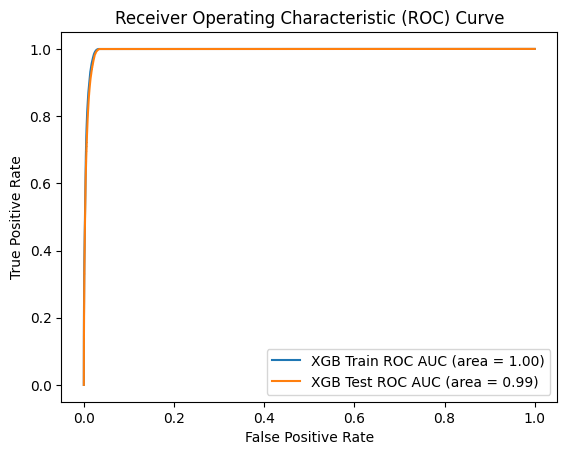

In [5]:
# xgboost model

import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Imputation (already done earlier, but repeating for clarity)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(gsg_df_train.drop(columns=['ID']))
X_test_imputed = imputer.transform(df_test.drop(columns=['ID']))

# Build XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_imputed, gsg_df_y_train.drop(columns=['ID']))

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train_imputed)
y_test_pred_xgb = xgb_model.predict(X_test_imputed)

# Model Performance Metrics
train_accuracy_xgb = accuracy_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(df_y_test.drop(columns=['ID']), y_test_pred_xgb)
train_precision_xgb = precision_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_xgb)
test_precision_xgb = precision_score(df_y_test.drop(columns=['ID']), y_test_pred_xgb)
train_recall_xgb = recall_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_xgb)
test_recall_xgb = recall_score(df_y_test.drop(columns=['ID']), y_test_pred_xgb)

# ROC and AUC
y_train_pred_proba_xgb = xgb_model.predict_proba(X_train_imputed)[:, 1]
y_test_pred_proba_xgb = xgb_model.predict_proba(X_test_imputed)[:, 1]
train_roc_auc_xgb = roc_auc_score(gsg_df_y_train.drop(columns=['ID']), y_train_pred_proba_xgb)
test_roc_auc_xgb = roc_auc_score(df_y_test.drop(columns=['ID']), y_test_pred_proba_xgb)

train_fpr_xgb, train_tpr_xgb, _ = roc_curve(gsg_df_y_train.drop(columns=['ID']), y_train_pred_proba_xgb)
test_fpr_xgb, test_tpr_xgb, _ = roc_curve(df_y_test.drop(columns=['ID']), y_test_pred_proba_xgb)


# Print Results
print("\nXGBoost Model Performance:")
print("Training Accuracy:", train_accuracy_xgb)
print("Test Accuracy:", test_accuracy_xgb)
print("Training Precision:", train_precision_xgb)
print("Test Precision:", test_precision_xgb)
print("Training Recall:", train_recall_xgb)
print("Test Recall:", test_recall_xgb)
print("Training ROC AUC:", train_roc_auc_xgb)
print("Test ROC AUC:", test_roc_auc_xgb)

# Plot ROC Curve for XGBoost model
plt.plot(train_fpr_xgb, train_tpr_xgb, label='XGB Train ROC AUC (area = %0.2f)' % train_roc_auc_xgb)
plt.plot(test_fpr_xgb, test_tpr_xgb, label='XGB Test ROC AUC (area = %0.2f)' % test_roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [6]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

drive.mount('/content/drive')
gsg_df_train = pd.read_csv('/content/drive/My Drive/X_Train_Data_Input.csv')
gsg_df_y_train = pd.read_csv('/content/drive/My Drive/Y_Train_Data_Target.csv')
df_test = pd.read_csv('/content/drive/My Drive/X_Test_Data_Input.csv')
df_y_test= pd.read_csv('/content/drive/My Drive/Y_Test_Data_Target.csv')

# Imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(gsg_df_train.drop(columns=['ID']))
X_test_imputed = imputer.transform(df_test.drop(columns=['ID']))

gsg_df_train_sampled = gsg_df_train.sample(frac=0.5, random_state=42)  # Use 50% of data
gsg_df_y_train_sampled = gsg_df_y_train.sample(frac=0.5, random_state=42)


# Parameter Tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100],  # Try just one value for n_estimators to save time
    'max_depth': [5, 10],   # Fewer depth options
    'min_samples_split': [5],  # A single value for simplicity
    'random_state': [42]
}


rf_model = RandomForestClassifier()
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=5,  # Number of parameter settings sampled
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
random_search_rf.fit(X_train_imputed, gsg_df_y_train.drop(columns=['ID']))
# Best model from RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_
print("Best Random Forest Model Parameters:", random_search_rf.best_params_)








Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Random Forest Model Parameters: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}



Best Random Forest Model Performance:
Training Accuracy: 0.9768166667303502
Test Accuracy: 0.9767454300910925
Training Precision: 0.8473935064773448
Test Precision: 0.8448838762335832
Training Recall: 0.9197790174651844
Test Recall: 0.9228057379042062
Training ROC AUC: 0.9939512405125056
Test ROC AUC: 0.9937207492619522


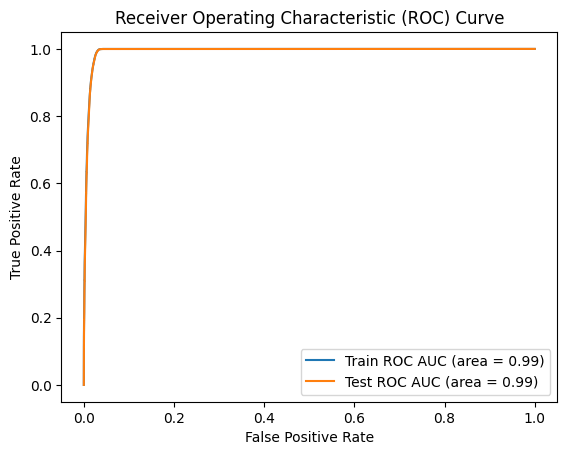

In [7]:
# Evaluate the best models (RF and XGBoost)
def evaluate_model(model, X_train, y_train, X_test, y_test):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)

  y_train_pred_proba = model.predict_proba(X_train)[:, 1]
  y_test_pred_proba = model.predict_proba(X_test)[:, 1]
  train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
  test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

  train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred_proba)
  test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred_proba)

  print("Training Accuracy:", train_accuracy)
  print("Test Accuracy:", test_accuracy)
  print("Training Precision:", train_precision)
  print("Test Precision:", test_precision)
  print("Training Recall:", train_recall)
  print("Test Recall:", test_recall)
  print("Training ROC AUC:", train_roc_auc)
  print("Test ROC AUC:", test_roc_auc)

  plt.plot(train_fpr, train_tpr, label='Train ROC AUC (area = %0.2f)' % train_roc_auc)
  plt.plot(test_fpr, test_tpr, label='Test ROC AUC (area = %0.2f)' % test_roc_auc)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()


print("\nBest Random Forest Model Performance:")
evaluate_model(best_rf_model, X_train_imputed, gsg_df_y_train.drop(columns=['ID']), X_test_imputed, df_y_test.drop(columns=['ID']))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best XGBoost Model Parameters: {'random_state': 42, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}

Best XGBoost Model Performance:
Training Accuracy: 0.9788303382993709
Test Accuracy: 0.9781859448554135
Training Precision: 0.8522813734874702
Test Precision: 0.8471759581243823
Training Recall: 0.9380816662839545
Test Recall: 0.937839371099765
Training ROC AUC: 0.995109049531388
Test ROC AUC: 0.9948141997460754


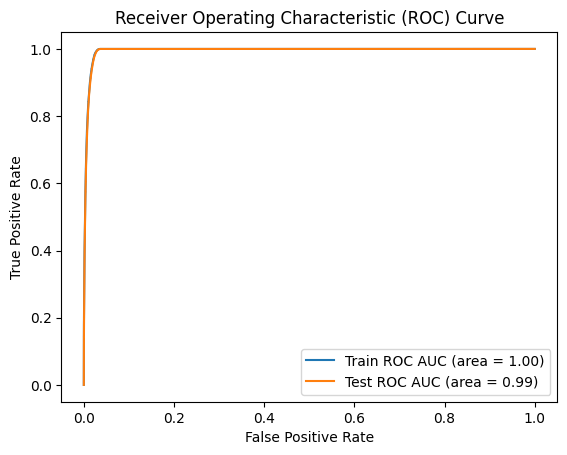

In [8]:
from sklearn.model_selection import train_test_split
# Split training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_imputed, gsg_df_y_train.drop(columns=['ID']), test_size=0.2, random_state=42
)

# Parameter Tuning for XGBoost using GridSearchCV
param_dist_xgb = {
    'n_estimators': [50, 100],  # Reduce the grid range
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],  # Reduce number of values
    'random_state': [42]
}

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

xgb_model = XGBClassifier(early_stopping_rounds=10)

random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=10,  # Reduce number of combinations
                                       cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train_split, y_train_split,
                      eval_set=[(X_val_split, y_val_split)],
                      verbose=False)  # Suppress training output

best_xgb_model = random_search_xgb.best_estimator_
print("Best XGBoost Model Parameters:", random_search_xgb.best_params_)

print("\nBest XGBoost Model Performance:")
evaluate_model(best_xgb_model, X_train_imputed, gsg_df_y_train.drop(columns=['ID']), X_test_imputed, df_y_test.drop(columns=['ID']))

In [10]:
import numpy as np
from sklearn.metrics import classification_report

# Predict on training and testing data
xgb_train_preds = best_xgb_model.predict(X_train_imputed)
rf_train_preds = best_rf_model.predict(X_train_imputed)
xgb_test_preds = best_xgb_model.predict(X_test_imputed)
rf_test_preds = best_rf_model.predict(X_test_imputed)

# Simple voting mechanism (majority voting)
train_ensemble_preds = np.round((xgb_train_preds + rf_train_preds) / 2)
test_ensemble_preds = np.round((xgb_test_preds + rf_test_preds) / 2)

# Evaluate the ensemble model performance on training data
train_accuracy = accuracy_score(gsg_df_y_train.drop(columns=['ID']), train_ensemble_preds)
print(f'Training Accuracy: {train_accuracy:.4f}')
print("Training Classification Report:\n", classification_report(gsg_df_y_train.drop(columns=['ID']), train_ensemble_preds))

# Evaluate the ensemble model performance on testing data
test_accuracy = accuracy_score(df_y_test.drop(columns=['ID']), test_ensemble_preds)
print(f'Testing Accuracy: {test_accuracy:.4f}')
print("Testing Classification Report:\n", classification_report(df_y_test.drop(columns=['ID']), test_ensemble_preds))


Training Accuracy: 0.9776
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    711100
           1       0.86      0.91      0.88     74033

    accuracy                           0.98    785133
   macro avg       0.93      0.95      0.94    785133
weighted avg       0.98      0.98      0.98    785133

Testing Accuracy: 0.9775
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.86      0.91      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.93      0.95      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [11]:
# Assign weights based on model performance
weight_xgb = 0.7  # More weight to XGBoost
weight_rf = 0.3   # Less weight to Random Forest

# Weighted voting
train_ensemble_preds = np.round((weight_xgb * xgb_train_preds + weight_rf * rf_train_preds) / (weight_xgb + weight_rf))
test_ensemble_preds = np.round((weight_xgb * xgb_test_preds + weight_rf * rf_test_preds) / (weight_xgb + weight_rf))

# Evaluate as before
train_accuracy = accuracy_score(gsg_df_y_train.drop(columns=['ID']), train_ensemble_preds)
test_accuracy = accuracy_score(df_y_test.drop(columns=['ID']), test_ensemble_preds)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')


Training Accuracy: 0.9788
Testing Accuracy: 0.9782
